In [33]:
import pandas as pd
import seaborn as sns

In [1]:
import numpy as np
from functools import partial

import matplotlib.pyplot as plt

# Estimación frequentista de parametros

Estoy siguiendo este curso para aprender acerca de inferencia estadistica, Este video toca el tema desde un punto de vista frecuentista.

- https://www.youtube.com/watch?v=4UJc0S8APm4

Dado un parametro $\theta$ y se produce una variable aleatoria, para la cual nuestro estimador genera otra variable aleatoria $\Theta$ que es nuestro valor estimado. El estimador funciona tanto como con valores escalares como con vectores.

<img  src="images/estimator.png"/>

El objetivo es construir un estimador con error ($\Theta$ - $\theta$) tan pequeno como sea posible.


<img  src="images/estimator-caracteristics.png"/>

Un buen estimador cumple con las siguientes caracteristicas, el valor de $\theta$ es desconocido, 

- No tiene sesgos: El valor esperado del estimador $E[\Theta]$ se acerca a $\theta$
- Es consistente: $\Theta_n$ --> $\theta$ 
- Tiene un mean square error pequeno: 



El describe 2 metodos para construir un estimador de un parametro:

- Maximun likehood
- Sample distribution (CLT theorem)

In [54]:
def check_bias(distribution_generator, estimator, N=1000):
    results = []
    for i in range(N):
        results.append(estimator(distribution_generator()))
    return np.mean(results)

def compute_samples_table(distribution_generator, estimator):
    results = []
    for i in [1, 10, 100, 1000, 10000]:
        X = distribution_generator(i)
        mu = estimator(X)
        df = pd.DataFrame({'values': X})
        df.loc[:, "estimate"] = mu
        df.loc[:, "sample"] = i
        results.append(df)
    return pd.concat(results)

def estimators_samples_fixed_N(distribution_generator, estimator, N):
    results = []
    for i in [1, 10, 100, 1000, 10000]:
        estimators = []
        for j in range(i):
            mu = estimator(distribution_generator(N))
            estimators.append(mu)
        df = pd.DataFrame({'values': estimators})
        df.loc[:, "sample"] = i
        results.append(df)
    return pd.concat(results)

def estimators_samples_table(distribution_generator, estimator):
    results = []
    for i in [1, 10, 100, 1000, 10000]:
        df = estimators_samples_fixed_N(gen_normal_sample, 
                                        estimate_mean, i)
        df.loc[:, "N"] = i
        results.append(df)
    return pd.concat(results)

## Maximun likehood

# Sample distribution

Construir un estimador usando el teorema central del limite:

- Verificar que el valor esperado del estimador se apróxime al valor del parametro.
- Verificar que el valor del estimador mejora y consistente conforme incrementa el número de muestras.
- Verificar el mean squre error, debería ser más pequeno entre mas datos por la ley de los grandes números.

### Sample mean distribution

El estimador se puede construir con el promedio de los datos de la muestra: $\dfrac{\sum_{n=1}^{N} x_i} N$

### Normal distribution

Usar el paquete de numpy para generar muestras de una distribución normal, construir el estimador para la media y verificar los resultados.

In [3]:
MU = 10
SIGMA = 1

def gen_normal_sample(N, mu=MU, sigma=SIGMA):
    return np.random.normal(mu, sigma, 10)

def estimate_mean(X):
    return np.mean(X)

### Normal distribution: Sesgo

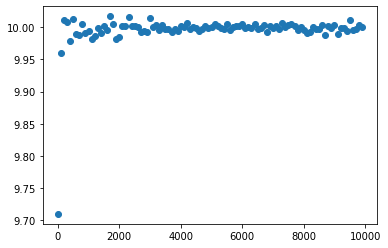

In [5]:
MSG = """
El estimador no presenta 
"""

samples = list(range(1, 10000, 100))
expected_values = list(map(lambda e: check_bias(
    partial(normal_sample, 10), estimate_mean, N=e), samples))
plt.plot(samples, expected_values, 'o')

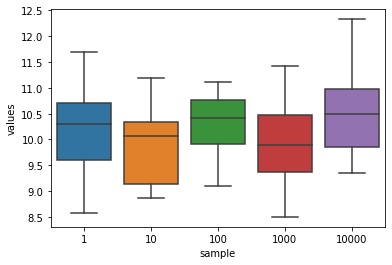

In [50]:
MSG = """
Hacer un box plot con la distribución de probabilidad de la muestra con estos tamanos:
1, 10, 100, 1000, 10000, 100000.

El resultado tiene sentido entre más puntos las distribución tiene menos
sesgo.
"""

df = compute_samples_table(gen_normal_sample, estimate_mean)
sns.boxplot(data=df, y="values", x="sample", showfliers=True)

### Normal distribution: Consistencia

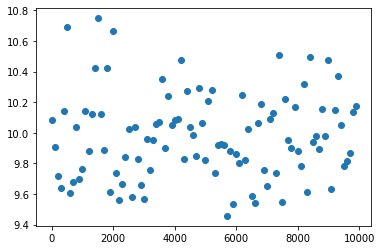

In [51]:
MSG = """
El estimado debería acercarcse a teta, pero no lo esta haciendo.

Algo estoy haciendo mal, el dice que el estimador tiene a theta en proababilidad,
que quiere decir?
"""

samples = list(range(1, 10000, 100))
expected_values = list(map(lambda e: 
                estimate_mean(gen_normal_sample(e)), samples))
plt.plot(samples, expected_values, 'o')

In [ ]:
MSG = """
Hacer un box plot con la distribución de probabilidad del estimador, la idea es
generar k muestras de tamano n, graficar la distribución de estas k muestras,
entre más grande el número k menos varianza debería tener la distribución.

El estimador es consistente, aun con muestras pequenas la distribución
del estimador tiende hacia el parametro.
"""

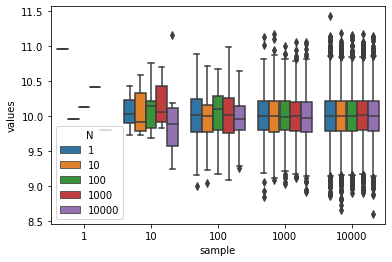

In [73]:
df_e = estimators_samples_table(gen_normal_sample, estimate_mean)
sns.boxplot(data=df_e, y="values", x="sample", hue="N", showfliers=True)

### Uniform distribution

### Exponential distribution